# Dividendos Automáticos: Selecionar as maiores pagadoras de dividendos da bolsa funciona?


Desafio:

° Testar se a regra de investimento em dividendos funciona no Brasil.

Passo a Passo:

**Passo 1** -  Importa os módulos e bibliotecas.
**Passo 2** -  Baixar os dados disponibilizados.
**Passo 3** - Calcular a rentabilidade mensal das empresas.
**Passo 4** - Filtrar a liquidez.
**Passo 5** -  Criar o ranking do indicador.
**Passo 6** - Criar as carteiras.
**Passo 7** - Calcular a rentabilidade por carteira
**Passo 8** - Calcular a rentabilidade do modelo
**Passo 9** - Calcular a rentabilidade do ibovespa no mesmo período
**Passo 10** - Analisar os resultados.

In [52]:
import pandas as pd
import quantstats as qs

In [53]:
dados_empresas = pd.read_csv("dados_empresas.csv")
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,m_6,dy
0,2019-04-30,AALR3,14.87,2569789.0,1.773209e+09,0.005640
1,2019-05-31,AALR3,13.90,1586619.0,1.658465e+09,0.006030
2,2019-06-30,AALR3,14.30,10832812.0,1.705782e+09,0.005863
3,2019-07-31,AALR3,14.67,2810704.0,1.749551e+09,0.005716
4,2019-08-31,AALR3,18.99,4488459.0,2.265307e+09,0.004415
...,...,...,...,...,...,...
48072,2024-02-29,ZAMP3,4.17,1904103.0,1.148232e+09,0.000000
48073,2024-03-31,ZAMP3,3.39,3412842.0,9.334550e+08,0.000000
48074,2024-04-30,ZAMP3,3.86,3093860.0,1.062872e+09,0.000000
48075,2024-05-31,ZAMP3,3.15,1874658.0,8.673697e+08,0.000000


In [54]:
dados_empresas["Retorno"]= dados_empresas.groupby("ticker")["preco_fechamento_ajustado"].pct_change()
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,m_6,dy,Retorno
0,2019-04-30,AALR3,14.87,2569789.0,1.773209e+09,0.005640,NaN
1,2019-05-31,AALR3,13.90,1586619.0,1.658465e+09,0.006030,-0.065232
2,2019-06-30,AALR3,14.30,10832812.0,1.705782e+09,0.005863,0.028777
3,2019-07-31,AALR3,14.67,2810704.0,1.749551e+09,0.005716,0.025874
4,2019-08-31,AALR3,18.99,4488459.0,2.265307e+09,0.004415,0.294479
...,...,...,...,...,...,...,...
48072,2024-02-29,ZAMP3,4.17,1904103.0,1.148232e+09,0.000000,-0.162651
48073,2024-03-31,ZAMP3,3.39,3412842.0,9.334550e+08,0.000000,-0.187050
48074,2024-04-30,ZAMP3,3.86,3093860.0,1.062872e+09,0.000000,0.138643
48075,2024-05-31,ZAMP3,3.15,1874658.0,8.673697e+08,0.000000,-0.183938


In [55]:
dados_empresas["Retorno"]= dados_empresas.groupby("ticker")["Retorno"].shift(-1)
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,m_6,dy,Retorno
0,2019-04-30,AALR3,14.87,2569789.0,1.773209e+09,0.005640,-0.065232
1,2019-05-31,AALR3,13.90,1586619.0,1.658465e+09,0.006030,0.028777
2,2019-06-30,AALR3,14.30,10832812.0,1.705782e+09,0.005863,0.025874
3,2019-07-31,AALR3,14.67,2810704.0,1.749551e+09,0.005716,0.294479
4,2019-08-31,AALR3,18.99,4488459.0,2.265307e+09,0.004415,0.005266
...,...,...,...,...,...,...,...
48072,2024-02-29,ZAMP3,4.17,1904103.0,1.148232e+09,0.000000,-0.187050
48073,2024-03-31,ZAMP3,3.39,3412842.0,9.334550e+08,0.000000,0.138643
48074,2024-04-30,ZAMP3,3.86,3093860.0,1.062872e+09,0.000000,-0.183938
48075,2024-05-31,ZAMP3,3.15,1874658.0,8.673697e+08,0.000000,0.187302


In [56]:
dados_empresas = dados_empresas[dados_empresas["volume_negociado"] > 1000000]
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,m_6,dy,Retorno
0,2019-04-30,AALR3,14.87,2569789.0,1.773209e+09,0.005640,-0.065232
1,2019-05-31,AALR3,13.90,1586619.0,1.658465e+09,0.006030,0.028777
2,2019-06-30,AALR3,14.30,10832812.0,1.705782e+09,0.005863,0.025874
3,2019-07-31,AALR3,14.67,2810704.0,1.749551e+09,0.005716,0.294479
4,2019-08-31,AALR3,18.99,4488459.0,2.265307e+09,0.004415,0.005266
...,...,...,...,...,...,...,...
48072,2024-02-29,ZAMP3,4.17,1904103.0,1.148232e+09,0.000000,-0.187050
48073,2024-03-31,ZAMP3,3.39,3412842.0,9.334550e+08,0.000000,0.138643
48074,2024-04-30,ZAMP3,3.86,3093860.0,1.062872e+09,0.000000,-0.183938
48075,2024-05-31,ZAMP3,3.15,1874658.0,8.673697e+08,0.000000,0.187302


In [57]:
dados_empresas["ranking_dy"] = dados_empresas.groupby("data")["dy"].rank(ascending=False)
dados_empresas

C:\Users\rvcam\AppData\Local\Temp\ipykernel_24796\2272982636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_empresas["ranking_dy"] = dados_empresas.groupby("data")["dy"].rank(ascending=False)


,data,ticker,preco_fechamento_ajustado,volume_negociado,m_6,dy,Retorno,ranking_dy
0,2019-04-30,AALR3,14.87,2569789.0,1.773209e+09,0.005640,-0.065232,112.0
1,2019-05-31,AALR3,13.90,1586619.0,1.658465e+09,0.006030,0.028777,116.0
2,2019-06-30,AALR3,14.30,10832812.0,1.705782e+09,0.005863,0.025874,116.0
3,2019-07-31,AALR3,14.67,2810704.0,1.749551e+09,0.005716,0.294479,115.0
4,2019-08-31,AALR3,18.99,4488459.0,2.265307e+09,0.004415,0.005266,119.0
...,...,...,...,...,...,...,...,...
48072,2024-02-29,ZAMP3,4.17,1904103.0,1.148232e+09,0.000000,-0.187050,184.0
48073,2024-03-31,ZAMP3,3.39,3412842.0,9.334550e+08,0.000000,0.138643,189.5
48074,2024-04-30,ZAMP3,3.86,3093860.0,1.062872e+09,0.000000,-0.183938,183.5
48075,2024-05-31,ZAMP3,3.15,1874658.0,8.673697e+08,0.000000,0.187302,184.5


In [58]:
dados_empresas[dados_empresas["data"] == "2016-01-31"].sort_values("ranking_dy").head(10)


,data,ticker,preco_fechamento_ajustado,volume_negociado,m_6,dy,Retorno,ranking_dy
11109,2016-01-31,CESP6,10.17,18658857.0,3.938768e+09,0.368035,0.031465,1.0
6860,2016-01-31,BRAP4,1.52,7815108.0,1.105364e+09,0.311314,0.217105,2.0
7777,2016-01-31,BRPR3,507.23,2964819.0,2.430558e+09,0.273822,-0.028212,3.0
8186,2016-01-31,BRSR6,2.62,8182805.0,2.342814e+09,0.202409,0.255725,4.0
21566,2016-01-31,FESA4,0.95,4395575.0,6.005760e+08,0.149288,0.115789,5.0
3407,2016-01-31,BBAS3,4.33,139661844.0,3.968603e+10,0.148910,-0.023095,6.0
26815,2016-01-31,JSLG3,5.90,1249529.0,1.453790e+09,0.148199,-0.042373,7.0
36665,2016-01-31,QUAL3,8.29,32981022.0,3.700645e+09,0.140324,-0.044632,8.0
11360,2016-01-31,CGAS5,12.90,3469867.0,4.728911e+09,0.139977,0.155039,9.0
16711,2016-01-31,DIRR3,2.11,1159892.0,5.062159e+08,0.137106,0.440758,10.0


In [59]:
dados_empresas = dados_empresas[dados_empresas["ranking_dy"] <= 10]
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,m_6,dy,Retorno,ranking_dy
107,2016-08-31,ABCB4,9.32,4230166.0,2.496872e+09,0.070453,-0.059013,10.0
108,2016-09-30,ABCB4,8.77,2124493.0,2.460031e+09,0.074889,0.139111,7.0
109,2016-10-31,ABCB4,9.99,4111165.0,2.802613e+09,0.065735,-0.103103,9.0
110,2016-11-30,ABCB4,8.96,3237560.0,2.514698e+09,0.073261,0.010045,9.0
111,2016-12-31,ABCB4,9.05,4630701.0,2.538388e+09,0.078033,0.228729,6.0
...,...,...,...,...,...,...,...,...
47066,2020-11-30,VIVT4,45.34,104112265.0,7.633199e+10,0.074315,NaN,9.0
47358,2024-03-31,VULC3,17.16,20903661.0,4.259265e+09,0.183862,-0.086247,6.0
47359,2024-04-30,VULC3,15.68,10828767.0,4.347804e+09,0.195831,-0.058673,5.0
47360,2024-05-31,VULC3,14.76,22249040.0,4.053923e+09,0.210027,0.002033,3.0


In [60]:
rentabilidade_por_carteiras = dados_empresas.groupby("data")["Retorno"].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()
rentabilidade_por_carteiras 

,Retorno
data,
2012-12-31,-0.007835
2013-01-31,-0.029264
2013-02-28,-0.036653
2013-03-31,-0.073806
2013-04-30,-0.000204
...,...
2024-02-29,-0.007825
2024-03-31,0.009429
2024-04-30,0.010607


In [61]:
rentabilidade_por_carteiras['estrategia_dy'] = (rentabilidade_por_carteiras['Retorno'] + 1).cumprod() - 1

rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)

rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()

In [62]:
ibov = pd.read_csv("ibov.csv")

ibov

,data,fechamento
0,2012-12-31,60952.08
1,2013-01-31,59761.49
2,2013-02-28,57424.29
3,2013-03-31,56352.09
4,2013-04-30,55910.37
...,...,...
134,2024-02-29,129020.02
135,2024-03-31,128106.10
136,2024-04-30,125924.19
137,2024-05-31,122098.09


In [63]:
retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1

rentabilidade_por_carteiras['Ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('Retorno', axis = 1)
rentabilidade_por_carteiras

,estrategia_dy,Ibovespa
data,,
2013-01-31,-0.007835,-0.019533
2013-02-28,-0.036870,-0.057878
2013-03-31,-0.072171,-0.075469
2013-04-30,-0.140651,-0.082716
2013-05-31,-0.140826,-0.122162
...,...,...
2024-02-29,5.717961,1.116745
2024-03-31,5.665394,1.101751
2024-04-30,5.728238,1.065954


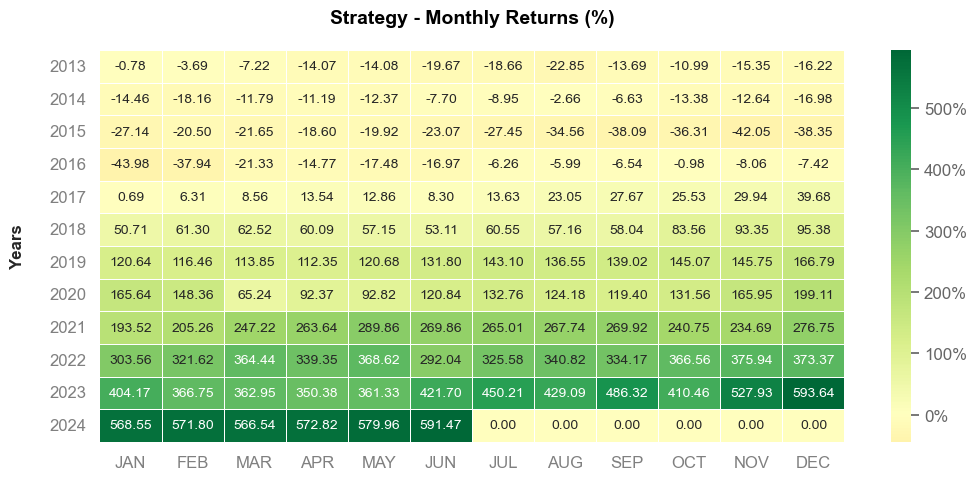

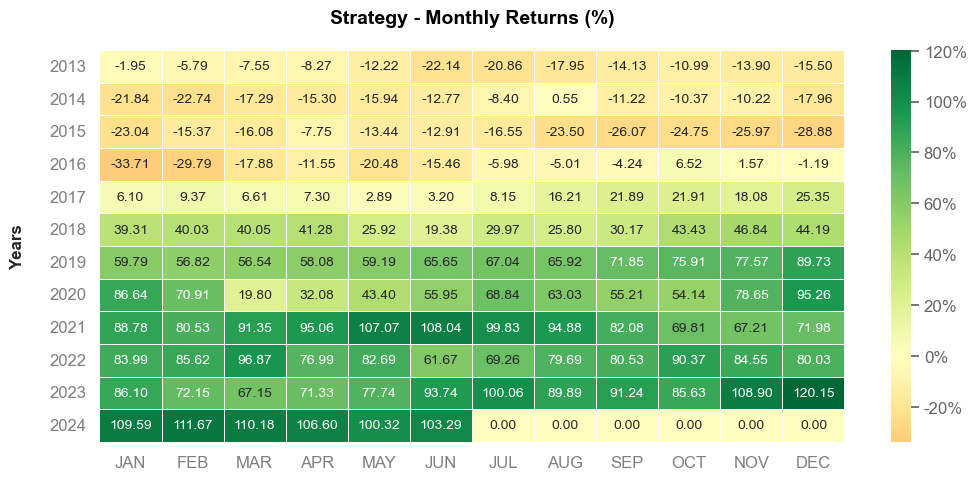

In [64]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)

rentabilidade_por_carteiras['estrategia_dy'].plot_monthly_heatmap()
rentabilidade_por_carteiras['Ibovespa'].plot_monthly_heatmap()